## Загрузка датасета и установка зависимостей

In [114]:
!pip install opendatasets

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [116]:
import opendatasets as datasets

In [117]:
datasets.download("https://www.kaggle.com/datasets/anshulmehtakaggl/60k-responses-of-16-personalities-test-mbt")

Skipping, found downloaded files in "./60k-responses-of-16-personalities-test-mbt" (use force=True to force download)


In [118]:
df = pd.read_csv("/content/60k-responses-of-16-personalities-test-mbt/16P.csv", encoding='cp1252').sample(10000, random_state=777)
df.head()

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
11130,11130,0,0,0,1,-1,3,-2,0,0,...,0,-2,0,-2,0,0,1,0,-1,ISFP
2210,2210,0,0,-2,-2,0,0,-3,1,-3,...,0,-2,0,-1,0,0,-2,0,1,ISFJ
11201,11201,0,0,-2,-1,1,3,-1,0,-1,...,0,-1,0,-1,0,0,-1,-1,-2,INFP
54858,54858,0,0,-1,1,-2,1,-1,0,0,...,0,-1,0,2,0,0,-1,-1,-2,ISFP
36028,36028,-1,0,-1,0,2,-2,2,1,2,...,0,0,0,3,0,0,3,0,1,ENFJ


Датасет содержит ответы людей на вопросы теста 16personalities.

## EDA и преобразования данных

Удаление лишних колонок

In [119]:
df.drop("Response Id", axis=1, inplace=True)

После удаления останется 60 целочисленных признаков, посмотрим статистику

In [120]:
df.describe()

,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,Even a small mistake can cause you to doubt your overall abilities and knowledge.,...,You would love a job that requires you to work alone most of the time.,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.002700,-0.000800,-0.006700,-0.227700,-0.191100,-0.009800,-0.472000,0.001100,0.126600,-0.011900,...,0.002700,-0.000700,0.108800,0.000700,0.22870,0.008800,-0.003000,0.114900,-0.014300,0.105400
std,0.362085,0.365531,1.532283,1.494883,1.500868,1.532233,1.447282,0.367304,1.548035,0.371446,...,0.369197,0.371905,1.512545,0.372442,1.49874,0.371398,0.370681,1.498173,1.516485,1.536661
min,-1.000000,-1.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-1.000000,-3.000000,-1.000000,...,-1.000000,-1.000000,-3.000000,-1.000000,-3.00000,-1.000000,-2.000000,-3.000000,-3.000000,-3.000000
25%,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-2.000000,0.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,-1.00000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,3.00000,1.000000,1.000000,3.000000,3.000000,3.000000


Проверим, есть ли пропущенные значения, дублирующиеся записи и константные признаки

In [121]:
df.isnull().sum()

You regularly make new friends.                                                               0
You spend a lot of your free time exploring various random topics that pique your interest    0
Seeing other people cry can easily make you feel like you want to cry too                     0
You often make a backup plan for a backup plan.                                               0
You usually stay calm, even under a lot of pressure                                           0
                                                                                             ..
You are very intrigued by things labeled as controversial.                                    0
You would pass along a good opportunity if you thought someone else needed it more.           0
You struggle with deadlines.                                                                  0
You feel confident that things will work out for you.                                         0
Personality                             

In [122]:
df.duplicated().sum()

0

In [123]:
df.nunique()

You regularly make new friends.                                                                3
You spend a lot of your free time exploring various random topics that pique your interest     3
Seeing other people cry can easily make you feel like you want to cry too                      7
You often make a backup plan for a backup plan.                                                7
You usually stay calm, even under a lot of pressure                                            7
                                                                                              ..
You are very intrigued by things labeled as controversial.                                     4
You would pass along a good opportunity if you thought someone else needed it more.            7
You struggle with deadlines.                                                                   7
You feel confident that things will work out for you.                                          7
Personality                   

Данные по целевому признаку распределены достаточно равномерно

In [124]:
df["Personality"].value_counts()

Personality
ENTP    663
ISFJ    656
INFP    648
ESTJ    641
ESTP    639
ISTP    629
ENTJ    629
ISTJ    627
ENFJ    626
INTJ    623
ESFJ    618
ISFP    616
INTP    603
ESFP    602
ENFP    601
INFJ    579
Name: count, dtype: int64

Преоброзвание категориального целевого признака Personality в число

In [125]:
from sklearn.preprocessing import LabelEncoder
df['Personality'] = LabelEncoder().fit_transform(df['Personality'])

Отделим целевой признак

In [126]:
X, y = df.drop('Personality', axis=1), df['Personality']

## PCA и t-SNE

### Уменьшение размерности данных с помощью PCA

In [127]:
from sklearn.decomposition import PCA

<timed exec>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


CPU times: user 177 ms, sys: 46.3 ms, total: 224 ms
Wall time: 496 ms


Text(0.5, 1.0, 'PCA projection')

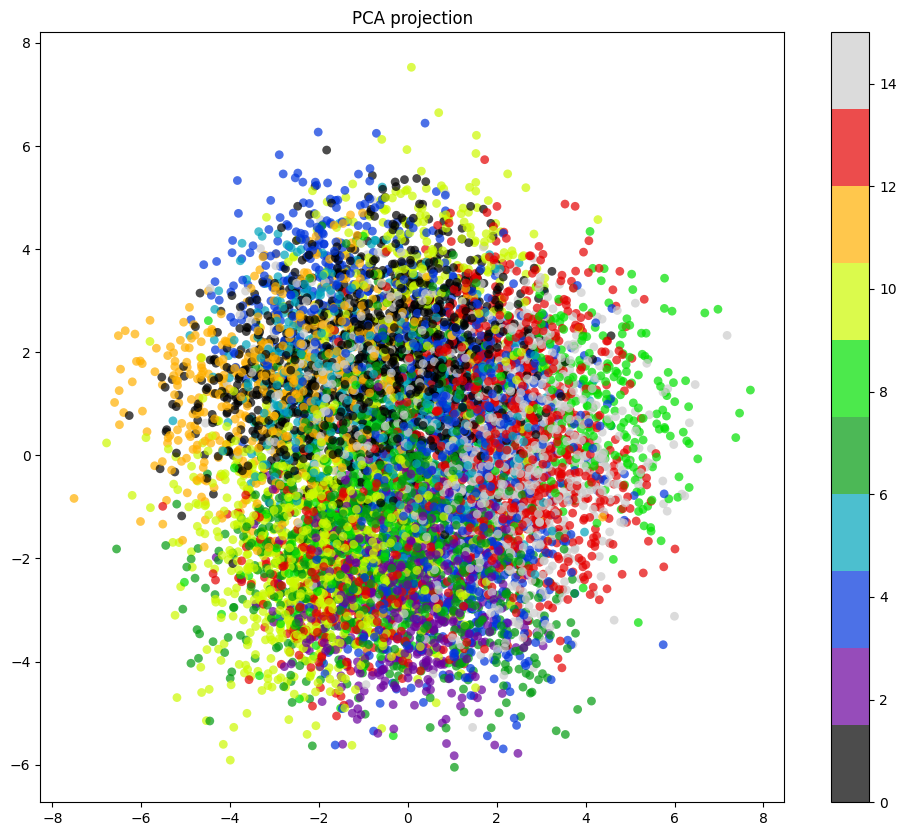

In [128]:
%%time

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            edgecolor='none', c=y, alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('PCA projection');

### Посмотрим какую дисперсию описывают разное количество компонентов

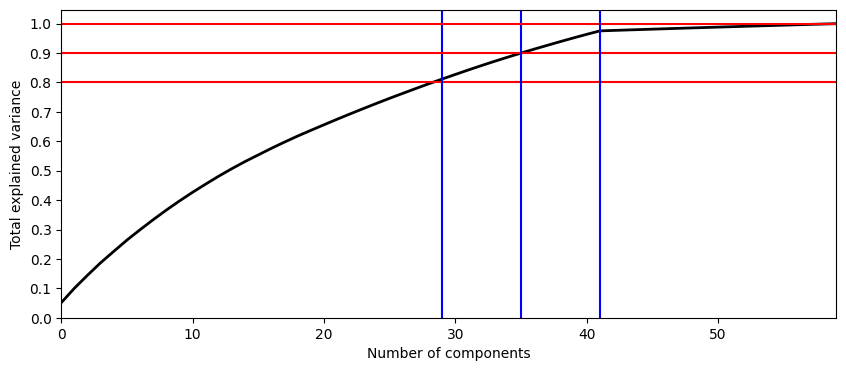

In [129]:
pca = PCA().fit(X)

plt.figure(figsize=(10,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 59)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(0.8, c='r')
plt.axvline(29, c='b')
plt.axhline(0.9, c='r')
plt.axvline(35, c='b')
plt.axhline(1, c='r')
plt.axvline(41, c='b')
plt.show();

Как видно из графика

*   29 компонент описывают ~80% дисперсии
*   35 компонент описывают ~90% дисперсии
*   41 компонента описывают ~97% дисперсии, при количестве > 41 изменения очень малы

Можем снизить размерность датасета с 60 до 41 без ощутимых потерь.

### Уменьшение размерности с помощью t-SNE

In [130]:
from sklearn.manifold import TSNE

CPU times: user 2min 37s, sys: 318 ms, total: 2min 38s
Wall time: 1min 46s


<timed exec>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


Text(0.5, 1.0, 't-SNE projection')

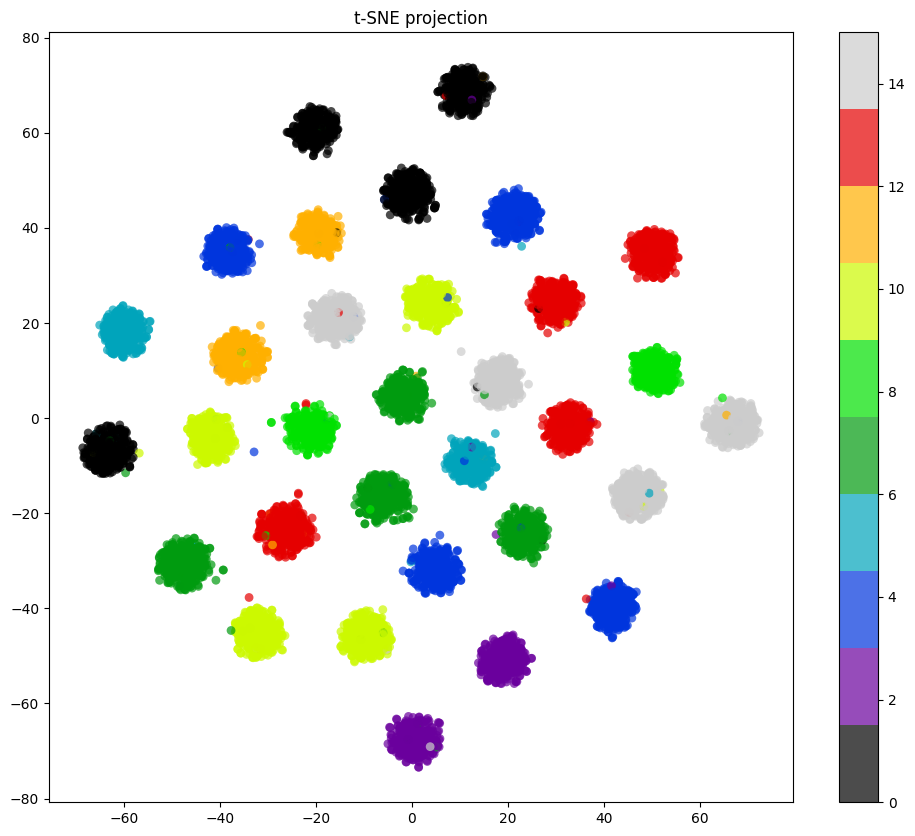

In [131]:
%%time

tsne = TSNE(random_state=777)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
            c=y, edgecolor="none", alpha=0.7, s=40,
            cmap=plt.cm.get_cmap("nipy_spectral", 10),
)
plt.colorbar()
plt.title("t-SNE projection");

Видно, что t-SNE показывает более четкое распределение на группы, чем PCA, но сильно проигрывает по времени.

## Релизация K-Means

In [132]:
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import check_random_state

class SimpleKMeans(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=3, max_iter=100, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def fit(self, X, y=None):
        random_state = check_random_state(self.random_state)
        self.labels_ = np.zeros(X.shape[0], dtype=int)
        self.cluster_centers_ = X[random_state.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            self.labels_ = pairwise_distances_argmin(X, self.cluster_centers_)
            new_centers = np.array([X[self.labels_ == i].mean(axis=0) for i in range(self.n_clusters)])

            if np.all(self.cluster_centers_ == new_centers):
                break

            self.cluster_centers_ = new_centers

        return self

    def predict(self, X):
        return pairwise_distances_argmin(X, self.cluster_centers_)

## Обучение моделей

In [133]:
!pip install python-stopwatch

In [137]:
import pathlib
import itertools
from stopwatch import Stopwatch
from sklearn import metrics, clone

X_scaled = [PCA(n_components=c).fit_transform(X) for c in [41, 35, 29]]
path = pathlib.Path("result.csv")


def train_and_store(estimator, param_variants):
    param_combinations = [
        dict(pc) for pc in
        itertools.product(*([(name, p) for p in pv] for (name, pv) in param_variants.items()))
    ]

    print(f"Best params for {estimator.__class__.__name__}")
    res = []

    for x in X_scaled:
        best_silhouette = None
        best_ami = None
        best_fmi = None

        for params in param_combinations:
            cloned_estimator = clone(estimator).set_params(**params)
            sw = Stopwatch()
            sw.start()
            pred = cloned_estimator.fit_predict(x)
            sw.stop()
            time = sw.elapsed

            if len(np.unique(pred)) in [1, 10000]:
                continue

            silhouette = metrics.silhouette_score(X, pred)
            if best_silhouette is None or silhouette > best_silhouette[0]:
                best_silhouette = silhouette, time, params

            ami = metrics.adjusted_mutual_info_score(y, pred)
            if best_ami is None or ami > best_ami[0]:
                best_ami = ami, time, params

            fmi = metrics.fowlkes_mallows_score(y, pred)
            if best_fmi is None or fmi > best_fmi[0]:
                best_fmi = fmi, time, params

        print(
            f"with number of components = {x.shape[1]}:",
            f"By Silhouette: {best_silhouette[2]}",
            f"By AMI: {best_ami[2]}",
            f"By FMI: {best_fmi[2]}",
            "",
            sep="\n",
        )

        res.append(
            {
                "Clusterizer": estimator.__class__.__name__,
                "Number of components": x.shape[1],
                "Fit_predict time, s": np.mean([best_silhouette[1], best_ami[1], best_fmi[1]]),
                "Silhouette": best_silhouette[0],
                "AMI": best_ami[0],
                "FMI": best_fmi[0]
            }
        )

    pd.DataFrame(res).to_csv(path, mode="a", header=not path.exists())

In [138]:
seed = 777

In [139]:
train_and_store(SimpleKMeans(n_clusters=16, random_state=seed), {})

Best params for SimpleKMeans
with number of components = 41:
By Silhouette: {}
By AMI: {}
By FMI: {}

with number of components = 35:
By Silhouette: {}
By AMI: {}
By FMI: {}

with number of components = 29:
By Silhouette: {}
By AMI: {}
By FMI: {}



In [140]:
from sklearn.cluster import KMeans
train_and_store(KMeans(n_clusters=16, n_init="auto", random_state=seed), {
    "algorithm": ["lloyd", "elkan"]
    })

Best params for KMeans
with number of components = 41:
By Silhouette: {'algorithm': 'lloyd'}
By AMI: {'algorithm': 'lloyd'}
By FMI: {'algorithm': 'lloyd'}

with number of components = 35:
By Silhouette: {'algorithm': 'lloyd'}
By AMI: {'algorithm': 'lloyd'}
By FMI: {'algorithm': 'lloyd'}

with number of components = 29:
By Silhouette: {'algorithm': 'lloyd'}
By AMI: {'algorithm': 'lloyd'}
By FMI: {'algorithm': 'lloyd'}



In [141]:
from sklearn.cluster import DBSCAN
train_and_store(DBSCAN(n_jobs=-1), {
    "eps": [0.5,1,2,4,8,16,32],
    "min_samples": [5,25,50,125,250,500],
    })

Best params for DBSCAN
with number of components = 41:
By Silhouette: {'eps': 8, 'min_samples': 5}
By AMI: {'eps': 8, 'min_samples': 50}
By FMI: {'eps': 8, 'min_samples': 5}

with number of components = 35:
By Silhouette: {'eps': 8, 'min_samples': 5}
By AMI: {'eps': 8, 'min_samples': 125}
By FMI: {'eps': 8, 'min_samples': 5}

with number of components = 29:
By Silhouette: {'eps': 8, 'min_samples': 50}
By AMI: {'eps': 8, 'min_samples': 250}
By FMI: {'eps': 8, 'min_samples': 5}



## Сравнение моделей

In [142]:
results = pd.read_csv('result.csv')

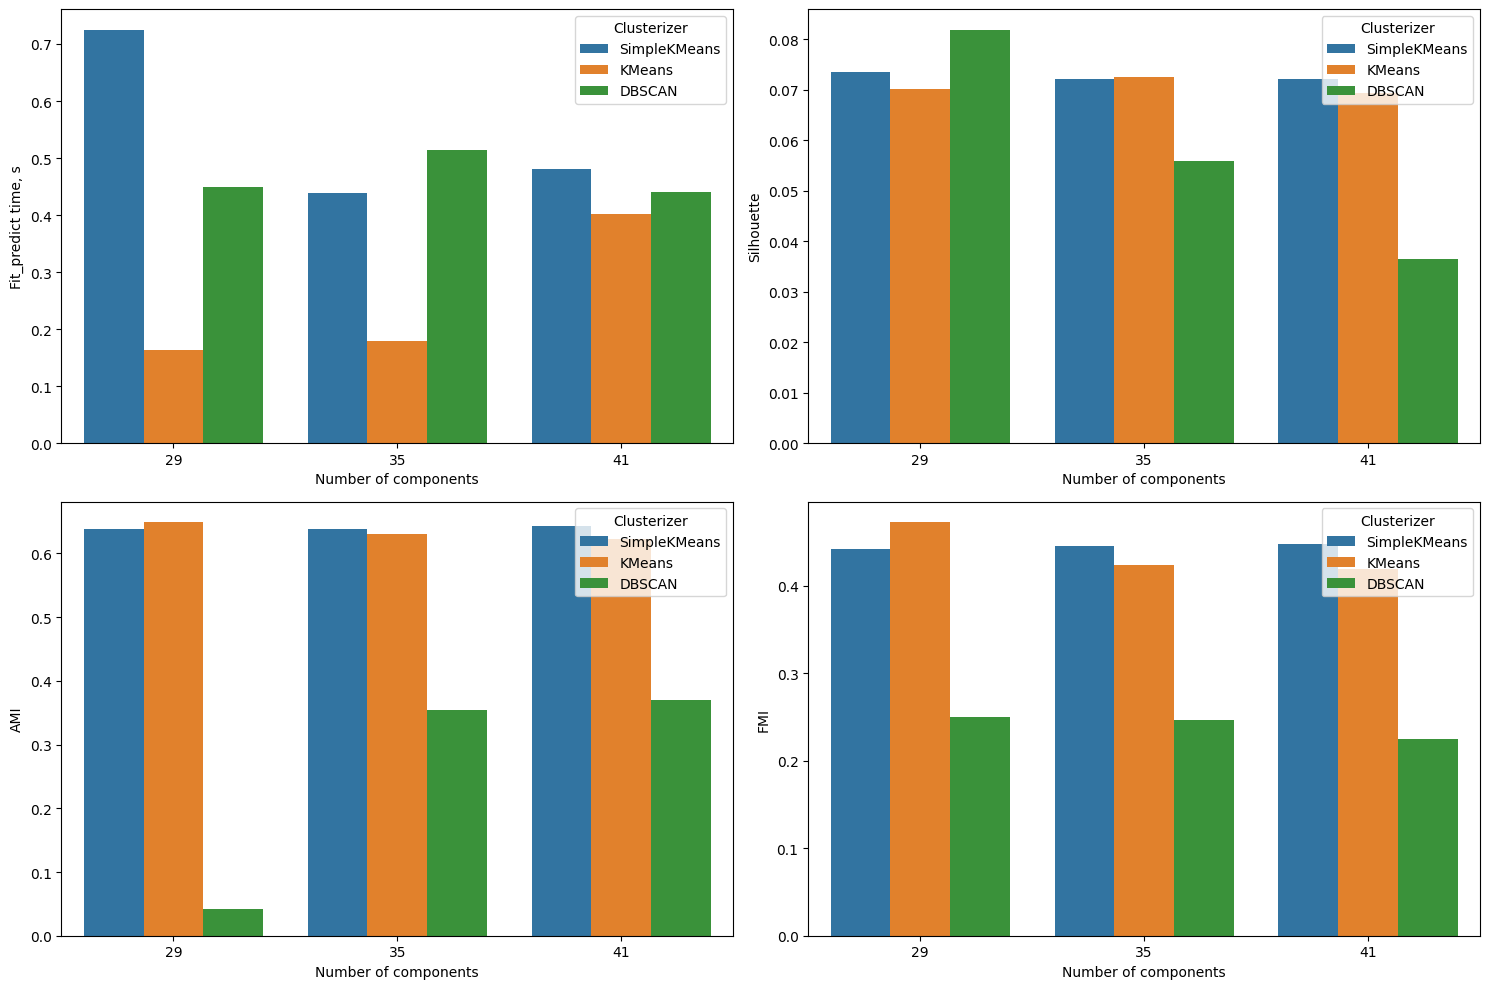

In [143]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
for metric, ax in zip(["Fit_predict time, s", "Silhouette", "AMI", "FMI"], axs.flatten()):
    sns.barplot(results, x="Number of components", y=metric, hue="Clusterizer", capsize=0.3, ax=ax)
    ax.tick_params(axis="x")
fig.tight_layout()
plt.show()

В данной задаче K-Means показал лучшие результаты, чем DBSCAN, как по качеству кластеризации, так и по времени. Собственная реализация тоже оказалась лучше по выбранным метрикам, кроме времени.